<a href="https://colab.research.google.com/github/faisalm93/data-science-30-day-portfolio/blob/main/day05_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

path = "/content/drive/MyDrive/data-science-30-day-portfolio/week1_finance_foundations/day05_classification"
os.makedirs(path, exist_ok=True)
path


'/content/drive/MyDrive/data-science-30-day-portfolio/week1_finance_foundations/day05_classification'

In [4]:
import pandas as pd

# Verified working URL for 'Default of Credit Card Clients' dataset from UCI
# The dataset is an Excel file, so we use pd.read_excel
# Based on common structure of this dataset, headers are typically in the second row (index 1)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Define Target Features
y = df['']default payment next month

In [9]:
X = df.drop(columns=['default payment next month'])


In [12]:
# Handling Missing Values
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

if not num_cols.empty:
    X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
else:
    print("No numerical columns found to impute.")

if not cat_cols.empty:
    X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
else:
    print("No categorical columns found to impute.")


No categorical columns found to impute.


In [20]:
# Ecode ad Scale feature
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd # Make sure pandas is imported if not already

# The 'sparse' argument was removed in scikit-learn version 1.2.
# Use 'sparse_output=False' for dense array output instead.

# Check if there are any categorical columns to encode
if not cat_cols.empty:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cat = encoder.fit_transform(X[cat_cols])

    encoded_cat_df = pd.DataFrame(
        encoded_cat,
        columns=encoder.get_feature_names_out(cat_cols)
    )
    X_final = pd.concat(
        [pd.DataFrame(X[num_cols].values, columns=num_cols), encoded_cat_df],
        axis=1
    )
    print("Categorical columns encoded and concatenated.")
else:
    # If no categorical columns, X_final is simply the numerical features
    # (which are all columns in X after the previous step)
    X_final = pd.DataFrame(X[num_cols].values, columns=num_cols)
    print("No categorical columns to encode. X_final contains only numerical features.")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)


No categorical columns to encode. X_final contains only numerical features.


In [21]:
# Handling Missing Values
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

if not num_cols.empty:
    X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
else:
    print("No numerical columns found to impute.")

if not cat_cols.empty:
    X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
else:
    print("No categorical columns found to impute.")

No categorical columns found to impute.


In [23]:
# Trai Test Splitig
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [24]:
#uildig Classificatio Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression
[[6806  203]
 [1520  471]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000


Random Forest
[[6613  396]
 [1269  722]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.81      0.79      9000



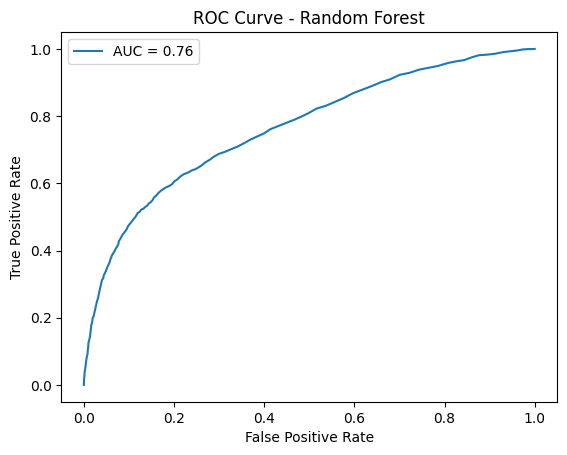

In [28]:
#Plottig ROC-AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob_rf = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob_rf)

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Results Iterpretatio
Logistic Regression:
Confusion Matrix:

True Negatives (Top-Left, 6806): The model correctly predicted 6806 instances where customers did not default (Class 0).

False Positives (Top-Right, 203): The model incorrectly predicted 203 instances where customers would default, but they actually did not.

False Negatives (Bottom-Left, 1520): The model incorrectly predicted 1520 instances where customers would not default, but they actually did (missed defaults).


True Positives (Bottom-Right, 471): The model correctly predicted 471 instances where customers did default (Class 1).

Classification Report:

Class 0 (No Default):
Precision (0.82): When the model predicts no default, it's correct 82% of the time.
Recall (0.97): The model correctly identifies 97% of all actual non-defaulters.
F1-Score (0.89):

A balanced measure, indicating good performance for predicting no default.
Class 1 (Default):
Precision (0.70): When the model predicts a default, it's correct 70% of the time.
Recall (0.24):

The model only correctly identifies 24% of all actual defaulters. This is quite low, meaning it misses a large number of defaulting customers.
F1-Score (0.35):

A low score, reflecting the poor recall for the positive class.
Accuracy (0.81): Overall, the model is correct 81% of the time.

However, accuracy can be misleading in imbalanced datasets (like this one, with more non-defaulters).
Macro Avg: Averages metrics without considering class imbalance.
Weighted Avg: Averages metrics considering class imbalance.


## My key TakeAway

- Random Forest outperforms Logistic Regression in capturing nonlinear patterns
- Credit history appears to be a dominant predictive feature

### Model Risks
- False negatives may lead to financial losses
- Model bias may exist against low-income applicants

### Future Improvements
- Hyperparameter tuning
- Cost-sensitive learning
- Fairness evaluation
